<a href="https://colab.research.google.com/github/parvathy-nsarma/CS675_MachineLearning/blob/main/Parvathy_Neelakanta_Sarma_Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 3

The goal in this assignment to work a little more with Python, reflect on how Adaline can fail to work on linearly separable data, and do some practice with logistic regression, still on 'toy' data sets. 

After covering a few more notions in lecture #4, we will play with the first 'real' data sets in the next assignment. 

In [ ]:
# grader's area
result = type('grades', (object,), {})
score = result()

## Preparation Steps

In [ ]:
# Import all necessary python packages
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression

In [ ]:
# ### Reading-in the Iris data

s = os.path.join('https://archive.ics.uci.edu', 'ml',
                 'machine-learning-databases', 'iris','iris.data')
s = s.replace("\\","/");
print('URL:', s)
df = pd.read_csv(s,header=None,encoding='utf-8')


URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


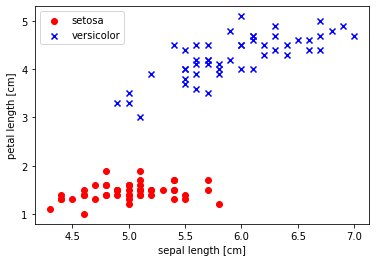

In [ ]:
# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[:100, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')


# plt.savefig('images/02_06.png', dpi=300)
plt.show()

## <font color = 'blue'> Question 1. Exact Adaline Weights </font>

In the class we discussed gradient descent for computing the weights of Adaline. But we also said that other solvers may be available. In Adaline, it is possible possible to use an 'exact' solver which works as follows:

 Suppose $\tilde{X}$ is the data matrix, with shape $n\times d$, where $d$ is the number of attributes.  Now let's augment $\tilde{X}$ by adding one extra attribute/column on the left side of $X$ with all entries being equal to 1. Let $X$ be this new matrix (this step reflects that $x_0=1$). Also, let $w$ be the vector of weights (with shape $(d+1)\times 1)$, and $y$ be the vector of labels (with shape $n \times 1$). It turns out that the optimal weight vector $w$ is given by 

$$
      w = (X^T X)^{-1} X^T y
$$

(i) Write a Python function *exactAdaline* (using numpy) that takes as input $\tilde{X}$ and $y$ and returns the optimal weights $w$, following the above description and formula. <br>
(ii) Apply the function on the iris dataset that you imported in an earlier cell. Report the weights calculated by the function. <br>
(iii) The total error for a vector $w$ is given by this formula

$$  err = || Xw - y||_2^2 $$

The subscript of the norm means the 2-norm. Use numpy to do your calculation. 

*(Please insert cells below for your answers. Clearly id the part of the question you answer)*

In [ ]:
#Question 1. Exact Adaline Weights
#(i) Write a Python function exactAdaline (using numpy) that takes as input  X~  and  y  and returns the optimal weights  w , following the above description and formula.
import numpy as np
def exactAdaline(xtilde, y):
  #dplusonebyone = np.ones(xtilde.shape[0])
  #X = np.vstack((dplusonebyone,xtilde))
  #np.column_stack() method 
  X = np.column_stack((np.ones(xtilde.shape[0]),xtilde))
  #w=((X.T*X)−1)*X.T*y
  w = np.linalg.multi_dot([np.linalg.inv(np.dot(X.T,X)),X.T,y])
  return X, w


In [ ]:
#Question 1. Exact Adaline Weights
#(ii) Apply the function on the iris dataset that you imported in an earlier cell. Report the weights calculated by the function.
X, w = exactAdaline(X,y)
print("Weights calculated by the function  \n ",w)

Weights calculated by the function  
  [-0.70498922 -0.27494856  0.7719192 ]


In [ ]:
#Question 1. Exact Adaline Weights
#(iii) The total error for a vector  w  is given by this formula
err = np.linalg.norm(np.dot(X,w)-y)**2
print("The total error for a vector  w \n",err)

The total error for a vector  w 
 4.870803095397431


In [ ]:
# For grader use only

G = [0]*5


# insert grade here  (out of 12)
# G[1] = 



##  <font color = 'blue'> Question 2. Adaline Fail ? </font>

Unlike the perceptron, adaline does **not** guarantee that the output will actually separate 2-label data points that are linearly separable. Construct a 2-dimensional data set (i.e. the data points and their labels), with the properties that: <br> 

(a) the data set is linearly separable  <br>
(b) the optimal adaline solution does not separate the data.  <br>

Demonstrate your answer as follows: <br>

(i) Plot the data points, as we did above for the iris data set. This will show that your data set is linearly separable. <br>
(ii) Calculate the optimal adaline weights using the function *exactAdaline* from question 1. <br>
(iii) Find one point in your data set, and show the calculations that prove that it is misclassified by the optimal adaline. 


**Hint**: In class we discussed how a 'far away' point can throw off linear regression. Try to base your answer on this. Your data set can only have 3-4 points. 

In [ ]:
# plot_decision_regions_adaline function to plot the region 
def plot_decision_regions_adaline(X, y, w_, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    # utilize given weight to derive Adaline classification decision.
    net_input = np.dot(np.array([xx1.ravel(), xx2.ravel()]).T, w_[1:]) + w_[0]
    Z = np.where(net_input >= 0.0, 1, -1).reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

In [ ]:
# class 1
x1 = np.array([[2,2],[2,5]])
y1 = np.array([1,1])

# class -1
x2 = np.array([[16,4],[50,5]])
y2 = np.array([-1,-1])

#  X,y
X_created = np.vstack((x1,x2))
y_created = np.hstack((y1, y2))

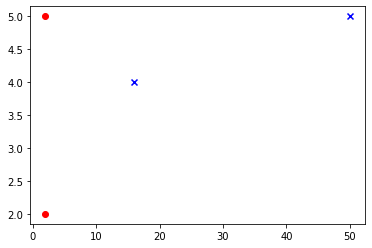

In [ ]:
# #Question 2: Adaline Fail
#(i) Plot the data points
plt.scatter(X_created[0:2, 0], X_created[0:2, 1],
            color='red', marker='o', label='1')
plt.scatter(X_created[2:4, 0], X_created[2:4, 1],
            color='blue', marker='x', label='-1')

a)This shows that the points created are linearly separable.

[ 0.75584416 -0.03982684 -0.01471861]


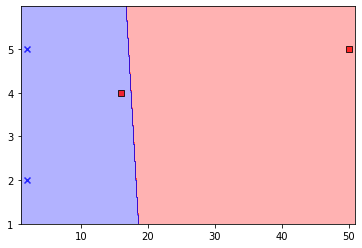

In [ ]:
##Question 2: Adaline Fail
#(ii) Calculate the optimal adaline weights using the function exactAdaline from question 1.
x_new, w_new = exactAdaline(X_created ,y_created)
print(w_new)
plot_decision_regions_adaline(X_created ,y_created, w_new)

(b) the optimal adaline solution does not separate the data.Reflecting on how Adaline can fail to work on linearly separable data.

In [ ]:
#Question 2: Adaline Fail
#(iii) Find one point in your data set, and show the calculations that prove that it is misclassified by the optimal adaline.
#The misclassified datapoint is (16,4)
z1 = w_new[0] + w_new[1]*X_created[0,0] + w_new[2]*X_created[0,1]
z2 = w_new[0] + w_new[1]*X_created[1,0] + w_new[2]*X_created[1,1]
z3 = w_new[0] + w_new[1]*X_created[2,0] + w_new[2]*X_created[2,1]
z4 = w_new[0] + w_new[1]*X_created[3,0] + w_new[2]*X_created[3,1]
print(z1,z2,z3,z4)


0.6467532467532473 0.6025974025974022 0.05974025974025987 -1.3090909090909086


**A positive z value (z3 value = 0.05974025974025987) makes Adaline classify datapoint as label 1 but actually datapoint(16,4) label is -1. So this proves that (16,4) is misclassified by the optimal adaline.**

In [ ]:
# for grader use

# insert grade here (out of 12)
# G[2] = 

## <font color = 'blue'> Question 3. Practice with logistic regression </font>

Let's first load the textbook's implementation of logistic regression with gradient descent.

In [ ]:
class LogisticRegressionGD(object):
    """Logistic Regression Classifier using gradient descent.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Logistic cost function value in each epoch.

    """
    def __init__(self, eta=0.05, n_iter=100, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            
            # note that we compute the logistic `cost` now
            # instead of the sum of squared errors cost
            cost = -y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output)))
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, z):
        """Compute logistic sigmoid activation"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)
        # equivalent to:
        # return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

Below you can see the first 3 data points of the data set, all labeled as 'setosa'. Let's set the numerical value for 'setosa' to 1. (i.e. y = 1). 

In [ ]:
#Since X was overwritten earlier adding some code

y = df.iloc[0:100, 4].values
#Let's set the numerical value for 'setosa' to 1
y = np.where(y == 'Iris-setosa', 1,0)
# extract sepal length and petal length
X = df.iloc[:100, [0, 2]].values


In [ ]:
#first 3 data points of the data set
print(X[0:3])
#first 3 labels of the data set
print(y[0:3])

[[5.1 1.4]
 [4.9 1.4]
 [4.7 1.3]]
[1 1 1]



Suppose the initial weights of the logistic neuron are w0=0.1, w1=-0.2, w2=0.1

(i) Write the weights after processing data points 0,1,2, with $\eta=0.1$ and show your calculations. (This is similar to the previous assignment, only done now for the logistic neuron) <br>



In [ ]:
eta = 0.1
w = np.array([0.1,-0.2,0.1])
x = X[0:3]
y = y[0:3]

In [ ]:
for i, record in enumerate(x):
    #print(i,record)
    net_input = np.dot(record, w[1:])+ w[0]
    #print(net_input)
    # logistic sigmoid activation
    output = 1./(1.+np.exp(-np.clip(net_input,-250,250)))
    #print(output)
    errors = y[i] - output
    #print(errors)
    w[1:]+= eta * x[i].T*errors
    w[0] += eta * errors.sum()
    # weights after processing data points 0,1,2, with  η=0.1  
    print('The new weights after processing point {} is {}'.format(i,w))

The new weights after processing point 0 is [0.16856801 0.14969686 0.19599522]
The new weights after processing point 1 is [0.19213665 0.26518321 0.22899132]
The new weights after processing point 2 is [0.20711645 0.33558826 0.24846505]


(ii) Using *LogisticRegressionGD* check if the data set you constructed in Question 2, also force logistic regression to fail. You can experiment with the number of iterations and the learning rate $\eta$. 


In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions_logistic(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    #Z  = np.dot(np.array([xx1.ravel(), xx2.ravel()]), w)    # Z=X*w
    #Z = np.sign(Z)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

In [ ]:
#calling the LogisticRegressionGD
lg = LogisticRegressionGD(eta=0.0001, n_iter=10000, random_state=1)
#fitting the data with the data set you constructed in Question 2
lg.fit(X_created, y_created)

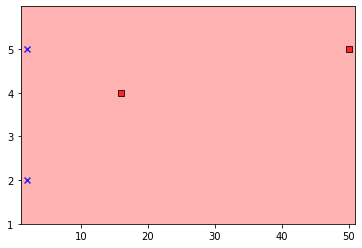

In [ ]:
plot_decision_regions_logistic(X = X_created, y = y_created, classifier = lg)

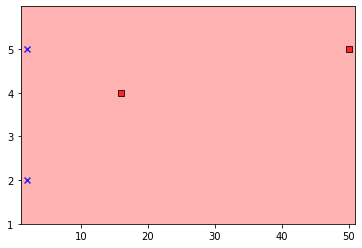

In [ ]:
#calling the LogisticRegressionGD
lg = LogisticRegressionGD(eta=0.01, n_iter=100, random_state=1)
#fitting the data with the data set you constructed in Question 2
lg.fit(X_created, y_created)
plot_decision_regions_logistic(X = X_created, y = y_created, classifier = lg)

**Using LogisticRegressionGD data set constructed in Question 2, also force logistic regression to fail.**


(iii) (optional) If logistic regression does not fail for your data set, can you construct another (linearly separable) data set which causes it to fail?

*(Please insert cells below for your answers. Clearly id the part of the question you answer)*

Played around with many points adaline barely misclassifying or very far point misclassifying. Niether is correctly classified in Logistic Regression GD.<br>
**Logistic regression GD fails for the created data set (from q2).**

In [ ]:
# Grader's area
rawScore = sum(score.__dict__.values())
possibleScore = max(len(score.__dict__.keys())*4,1)
rescaledScore = rawScore*100/possibleScore
print(rescaledScore)

0.0
